<h2> Data Processing</h2>
<p> In this section we will have analyze and perform data analysis on augmented data.<br>
We will also preprocess and prepare data for models
</p>

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [101]:
#  Results is a dict structure to store our training and validation accuracies and losses. 
results = {}

In [11]:
data = pd.read_csv('augmented_data.csv')

In [12]:
data.head()

,crop,moisture,temp,pump
0,cotton,638,16.0,1
1,cotton,522,18.0,1
2,cotton,741,22.0,1
3,cotton,798,32.0,1
4,cotton,690,28.0,1


<h4> Label Encoder </h4>
<p> We will take crop column and label encode it. 
<br>Label Encoding makes it possible for possible to interpret and comprehend the data by assigning each category a unique numerical variable. </p>

In [13]:
# Encode crop column to numerical format

label_encoder = LabelEncoder()
data['crop'] = label_encoder.fit_transform(data['crop'])

In [14]:
data.sample(5)

,crop,moisture,temp,pump
138,0,4,42.000000,0
27,0,714,14.000000,1
251,0,525,43.786534,1
175,0,1010,10.000000,1
214,0,151,41.940035,1


<h3> Data splits and standarization </h3>
<p>We will use features - Crop, Moisture and temperature to predict label 0 or 1.<br>
From above sample, we know that mositure and temperature are not standarized i.e they aren't on same scale.<br>
The main goal is to bring different feature variables to a similar scale, to ensure that certain features don't dominate others due to magnitudinal differences.</p>

In [15]:
# Split Features and Label
X = data.drop('pump', axis=1)
y = data['pump']

In [16]:
# Standardization
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [17]:
# Reshape X for CNN input
X_cnn = X.reshape((X.shape[0], X.shape[1], 1))

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cnn,y,test_size=0.2, random_state=42, stratify=y)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 3, 1), (100, 3, 1), (400,), (100,))

<h3> CNN model and architecture</h3>
<p> In this section we will design a custom Convolutional Neural Network classifier.</p>

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Conv1D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [54]:
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X.shape[1], 1), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Conv1D(filters=128, kernel_size=2, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

c:\Users\admin\miniconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Some design parameters and decisions we made while designing the CNN:<br>
1. Adding BatchNormalization to improve the training off deep neural networks by standardizing the inputs to a layer for each mini-batch.
2. Introducting Dropout Layers to avoid overfitting of the model.
3. Performing L2 regularization on convolutional layers to encourage model to keep weights small which will also prevent overfitting.



In [55]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 2, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 1, 128)         │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,841 (108.75 KB)

 Trainable params: 27,457 (107.25 KB)

 Non-trainable params: 384 (1.50 KB)

In [23]:
# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
# Train the model
history = model.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.5899 - loss: 2.8447 - val_accuracy: 0.5300 - val_loss: 2.7196
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6621 - loss: 2.6412 - val_accuracy: 0.6400 - val_loss: 2.6105
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6873 - loss: 2.5194 - val_accuracy: 0.6400 - val_loss: 2.5046
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6521 - loss: 2.4235 - val_accuracy: 0.6200 - val_loss: 2.4045
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6965 - loss: 2.2998 - val_accuracy: 0.6200 - val_loss: 2.3076
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6863 - loss: 2.2214 - val_accuracy: 0.6200 - val_loss: 2.2127
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6663 - loss: 2.1238 - val_accuracy: 0.6000 - val_loss: 2.1268
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6826 - loss: 2.0681 - val_accuracy: 0.6300 - 

In [59]:
# Save the model weights
model.save_weights('cnn_weights.weights.h5')

In [24]:
# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6824 - loss: 0.6583 
Test Loss: 0.6704403162002563
Test Accuracy: 0.6800000071525574


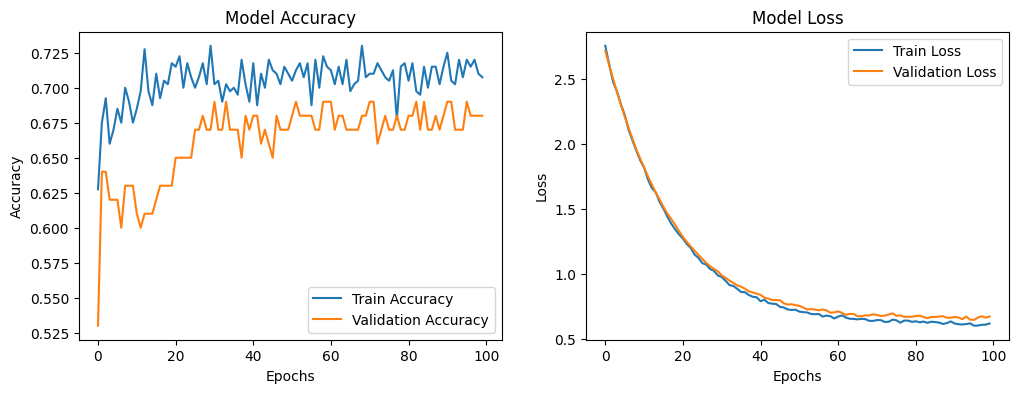

In [25]:
# Plotting training & validation accuracy and loss curves
def plot_history(history):
    # Summarize history for accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Plot the history
plot_history(history)

The plots show the training and validation accuracy and loss over 100 epochs for a model. Here are some observations and suggestions:

<h4>Model Accuracy:</h4>
<ul>
    <li> The training accuracy improves and stabilizes around 0.7 to 0.725
    <li> The validation accuracy is consistently lower than the training accuracy and shows more fluctuations, stabilizing around 0.65 to 0.675
</ul>

<h4>Model Loss:</h4>
<ul>
    <li> Both training and validation loss decrease steadily over the epochs, indication the model is learning.
    <li> The validation loss follows the training loss closely which is a good sign of the model generalizing well.
</ul>



In [102]:
# Add final epoch values to our Results dict for later comparision.
results['cnn_test_accuracy'] = history.history['val_accuracy'][-1]

<h3>Recurrent Neural networks</h3>

In [35]:
# Since we already applied a scaler to X we can use that data here.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42 )

We have to now reshape our data for RNN. RNN expects input in the form of [samples, time steps, features].

In [37]:
# Data points, number of features.
X_train.shape[0], X_train.shape[1]

(400, 3)

In [38]:
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [52]:
from tensorflow.keras.layers import LSTM


rnn_model = Sequential([
    LSTM(50, return_sequences= True, input_shape =(1,X_train.shape[1])),
    Dropout(0.2),
    LSTM(50, return_sequences = True),
    Dropout(0.2),
    LSTM(50, return_sequences = False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

c:\Users\admin\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<h5>Deep dive into model architecture</h5>
After some trail and error, we observed adding LSTM layers to RNN yielded a better model.<br>
Details:<br>
1. For LSTM layer we set 50 neurons, this is a tuneable hyperparameter. This layer also returns full sequence of outputs for each input sequence which is necessary especially when stacking two or more LSTM layers. Input dimension is the number of features.<br>
2.There is a dropout layer added after each Dense or LSTM layer to avoid overfitting.<br>
3. Outermost layer is Dense, with sigmoid activation to achieve binary classification as needed.

In [53]:
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use 'categorical_crossentropy' if multi-class

rnn_model.summary()
# model training
history = rnn_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 1, 50)          │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 1, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,501 (205.08 KB)

 Trainable params: 52,501 (205.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.6242 - loss: 0.6916 - val_accuracy: 0.6500 - val_loss: 0.6851
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6138 - loss: 0.6847 - val_accuracy: 0.6500 - val_loss: 0.6744
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5856 - loss: 0.6791 - val_accuracy: 0.6700 - val_loss: 0.6614
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6711 - loss: 0.6612 - val_accuracy: 0.7100 - val_loss: 0.6392
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6416 - loss: 0.6449 - val_accuracy: 0.7000 - val_loss: 0.6133
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7171 - loss: 0.6152 - val_accuracy: 0.7200 - val_loss: 0.5968
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6786 - loss: 0.6089 - val_accuracy: 0.7100 - val_loss: 0.5882
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6933 - loss: 0.5965 - val_accuracy: 0.7200 - 

In [57]:
# Evaluate the model on the testing set
test_loss, test_accuracy = rnn_model.evaluate(X_test_reshaped, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6512 - loss: 0.6117 
Test Loss: 0.5804486274719238
Test Accuracy: 0.6800000071525574


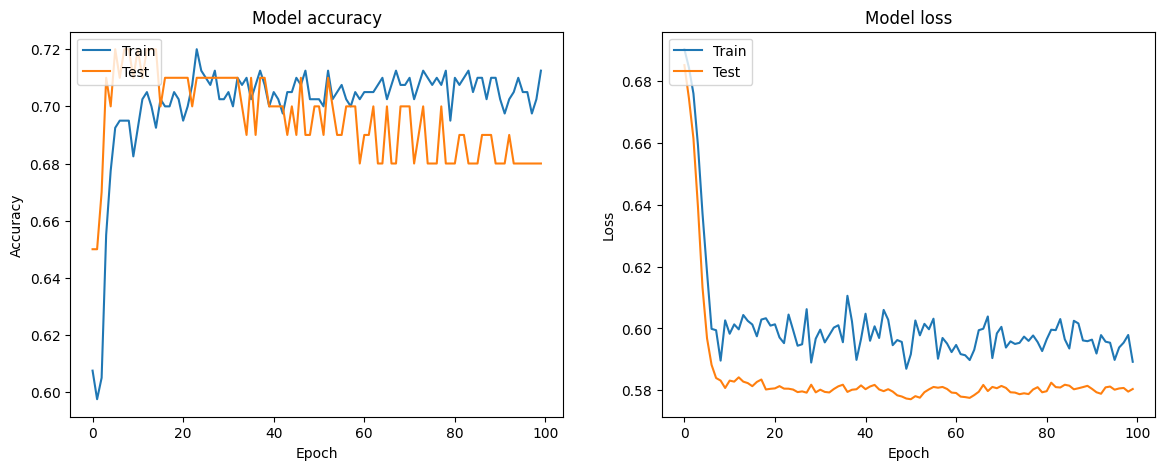

In [58]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [103]:
results['rnn_test_accuracy'] = history.history['val_accuracy'][-1]

<h3> Classical Machine Learning Models</h3>
<p>After exploring some deep learning models, the next step would be to compare their performance metrics - accuracy and loss against classical machine learning algorithms</p>

In [80]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import f1_score, precision_score,recall_score


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [82]:
classifiers = [
    LogisticRegression(max_iter=300),
    KNeighborsClassifier(),
    DecisionTreeClassifier(max_depth=5, random_state=43),
    RandomForestClassifier(max_depth=5, random_state=43),
    MLPClassifier(alpha=1, max_iter= 1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

We are going initialize and setup multiple classical machine learning classifiers to test against our deep learning model.

In [104]:
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    accuracy = classifier.score(X_test, y_test)
    precision = precision_score(y_test, classifier.predict(X_test)) 
    recall = recall_score(y_test, classifier.predict(X_test)) 
    f1 = f1_score(y_test, classifier.predict(X_test)) 
    results[f'{classifier}'] = accuracy 

    


c:\Users\admin\miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\admin\miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\admin\miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\admin\miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:954: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
c:\Users\admin\miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\admin\miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in mu

In [105]:
results

{'cnn_test_accuracy': 0.6800000071525574,
 'rnn_test_accuracy': 0.6800000071525574,
 'LogisticRegression(max_iter=300)': 0.71,
 'KNeighborsClassifier()': 0.66,
 'DecisionTreeClassifier(max_depth=5, random_state=43)': 0.68,
 'RandomForestClassifier(max_depth=5, random_state=43)': 0.68,
 'MLPClassifier(alpha=1, max_iter=1000)': 0.7,
 'AdaBoostClassifier()': 0.68,
 'GaussianNB()': 0.71,
 'QuadraticDiscriminantAnalysis()': 0.35}

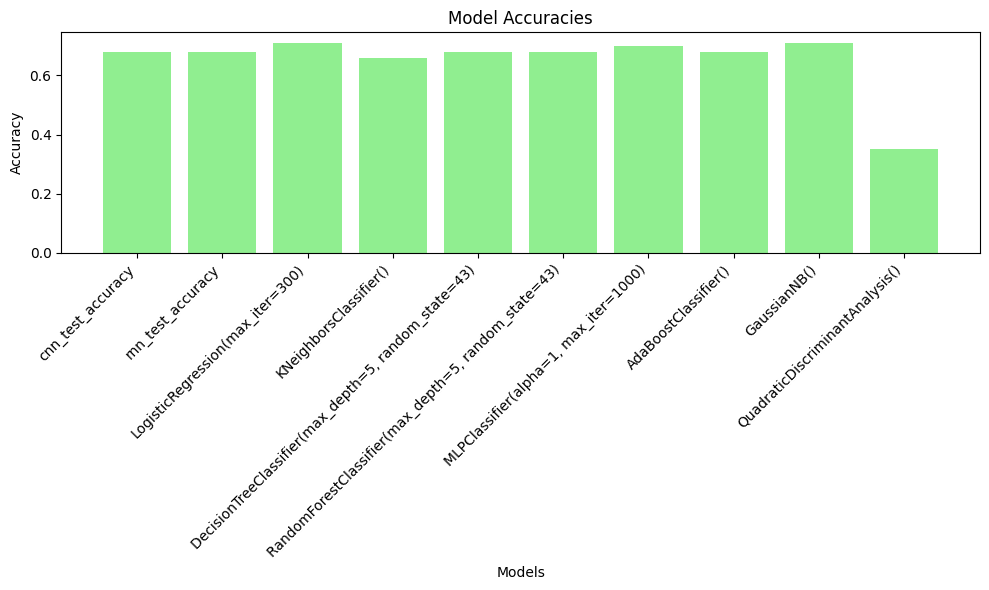

In [109]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='lightgreen')
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h3>Conclusion and Closing statements</h3>
<p> The above bar chart concludes and summarizes our findings. From visual perspective, we can see that most models achieved similar accuracy expect QuadraticDiscriminantAnalysis which ahs the least performance. Gaussian NB, AdaBoostClassifer, and Logistic show the highest accuracies.</p>


<p> Having more measured datapoints in our dataset can help us augment meaningful data to increase data points which would help our deep learning models to perform better.</p>